<a href="https://colab.research.google.com/github/Malbasahi/Customer_Segmentation_Using_Clustering_Techniques/blob/main/Customer_Segmentation_using_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

In [153]:
# Load your customer churn dataset
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [154]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [155]:
# Encoding Categorical Variables
data = pd.get_dummies(data, columns=['country', 'gender'], drop_first=True)

In [156]:
data.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [157]:
# Select the relevant features
features = data[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']]

In [158]:
# Feature scaling (standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [159]:
features.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [161]:
# Try different clustering algorithms and hyperparameters
algorithms = [
    ("K-Means", KMeans(n_clusters=3, random_state=0)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=3)),
    ("DBSCAN", DBSCAN(eps=0.5, min_samples=5)),
    ("Gaussian Mixture Model", GaussianMixture(n_components=3))
]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-162-e96e423baa18>:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


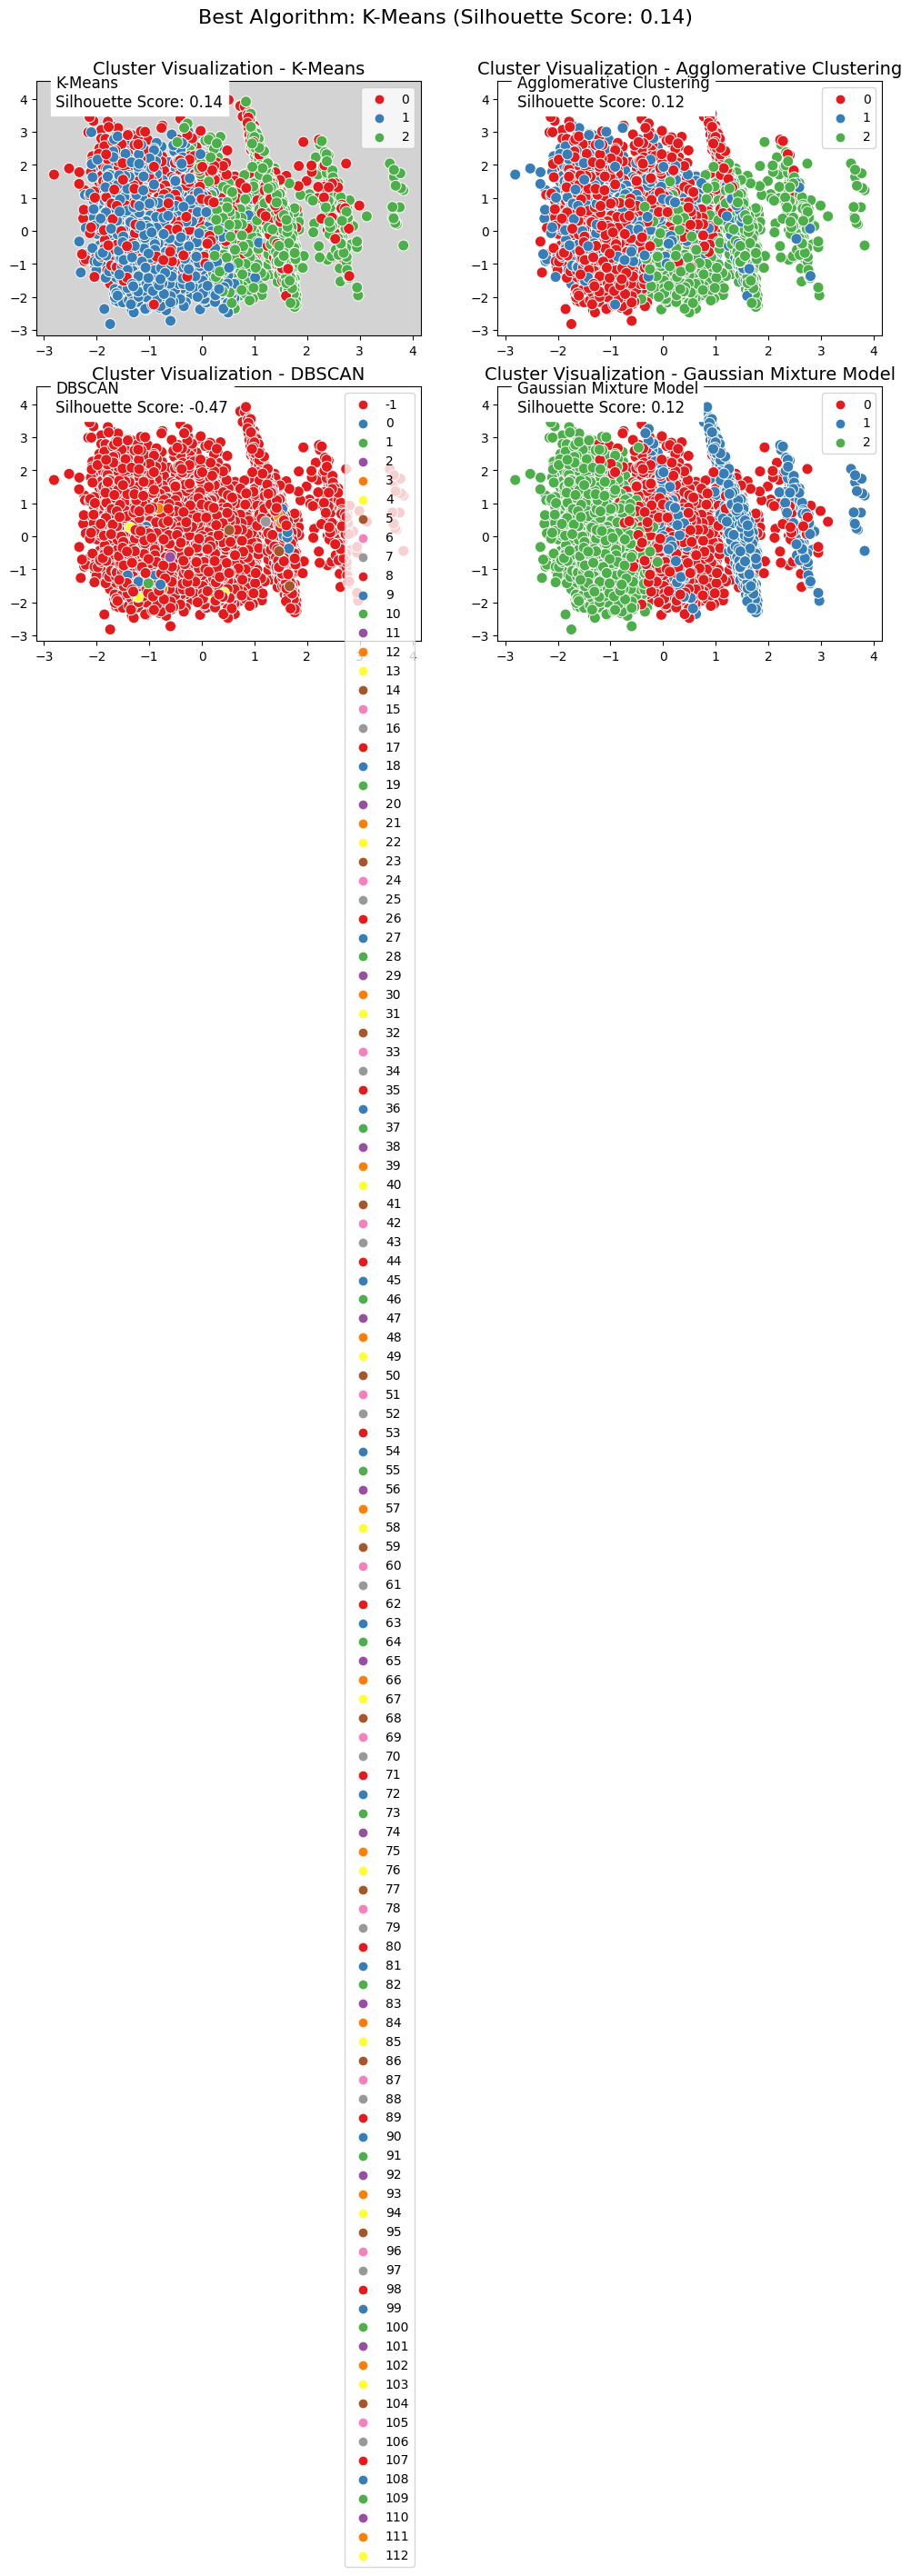

In [162]:
best_algorithm = None
best_silhouette_score = -1

# Create a color map for algorithms
algorithm_colors = sns.color_palette("Set1", n_colors=len(algorithms))

# Initialize subplot
plt.figure(figsize=(12, 8))

for i, (algorithm_name, clustering_algorithm) in enumerate(algorithms):
    cluster_labels = clustering_algorithm.fit_predict(scaled_features)

    # Calculate silhouette score for the current algorithm
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_algorithm = algorithm_name

    # Principal Component Analysis (PCA) for visualization
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # Create a color map for clusters
    unique_labels = np.unique(cluster_labels)
    n_clusters = len(unique_labels)
    cluster_colors = sns.color_palette("Set1", n_colors=n_clusters)

    # Create the scatter plot
    plt.subplot(2, 2, i + 1)
    scatter = sns.scatterplot(
        x=pca_features[:, 0],
        y=pca_features[:, 1],
        hue=cluster_labels,
        palette=cluster_colors,
        s=75,
        edgecolor='w',
    )

    # Add annotation with algorithm name and silhouette score
    plt.annotate(f'{algorithm_name}\nSilhouette Score: {silhouette_avg:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, backgroundcolor='w')

    # Highlight K-Means clustering
    if algorithm_name == 'K-Means':
        scatter.set_facecolor('lightgray')

    # Set plot title
    plt.title(f'Cluster Visualization - {algorithm_name}', fontsize=14)

# Adjust subplot layout
plt.tight_layout()

# Visual indication that K-Means clustering provides the best results
plt.suptitle(f'Best Algorithm: {best_algorithm} (Silhouette Score: {best_silhouette_score:.2f})', fontsize=16)

# Show the plots
plt.show()


In [163]:
# Indicate the best algorithm with a message
print(f"{best_algorithm} appears to provide the best results among the algorithms that have been tried.")

K-Means appears to provide the best results among the algorithms that have been tried.


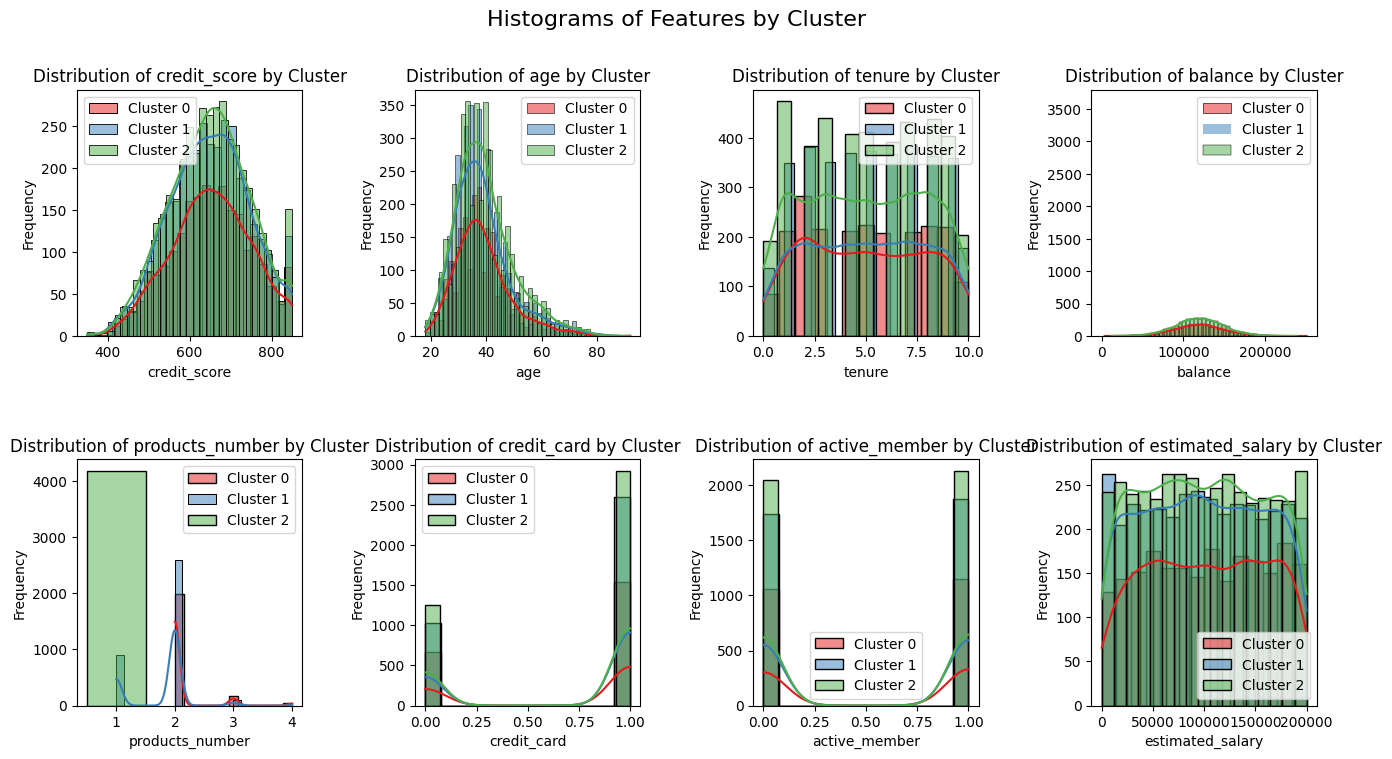

In [171]:
# Number of subplots based on the number of features
n_features = len(features.columns)

# Define the number of rows and columns for subplots
n_rows = 2  # Increase the number of rows for better readability
n_cols = n_features // n_rows

# Increase the figure size and set custom aspect ratio
plt.figure(figsize=(16, 8))

for i, feature in enumerate(features.columns):
    plt.subplot(n_rows, n_cols, i+1)
    for cluster in range(n_clusters):
        sns.histplot(data=data[data['clustering_algorithm'] == cluster], x=feature, kde=True, label=f'Cluster {cluster}', color=sns.color_palette("Set1")[cluster])
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Set a global title for the entire subplot grid
plt.suptitle('Histograms of Features by Cluster', fontsize=16)

plt.show()

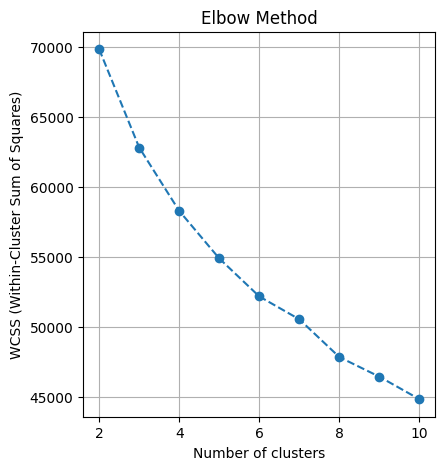

In [167]:
# Plot the Elbow method to find the optimal number of clusters
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()

# Add the clustering_algorithm column to your dataset
data['clustering_algorithm'] = 'K-Means'  # Indicate that K-Means is used for clustering

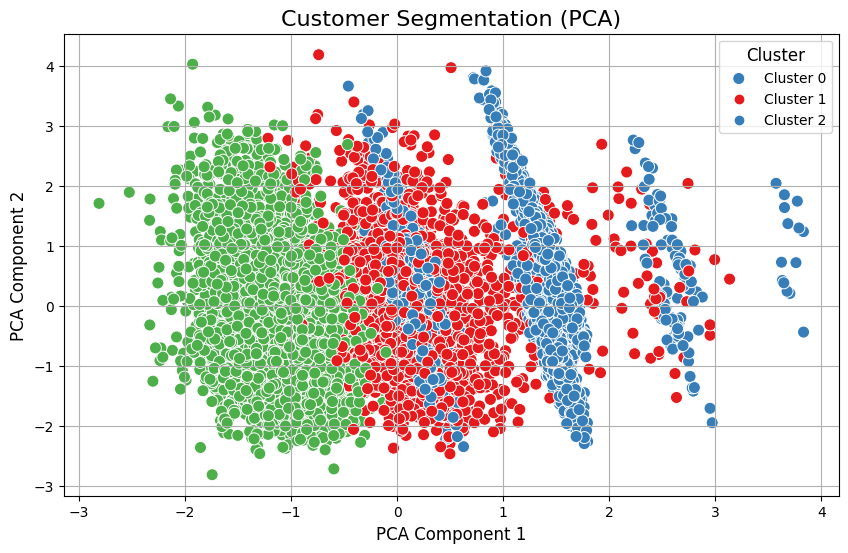

In [168]:
# Add the clustering_algorithm column to your dataset
data['clustering_algorithm'] = cluster_labels  # Replace dbscan_labels with the appropriate clustering labels

# Increase the figure size for better clarity
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=data['clustering_algorithm'], palette='Set1', s=75, edgecolor='w')

# Improve the plot title, axis labels, and legend
plt.title('Customer Segmentation (PCA)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Customize the legend
legend = scatter.legend(title='Cluster', loc='upper right', labels=[f'Cluster {i}' for i in range(n_clusters)])
legend.get_title().set_fontsize(12)

# Add a grid for better readability
plt.grid(True)

plt.show()


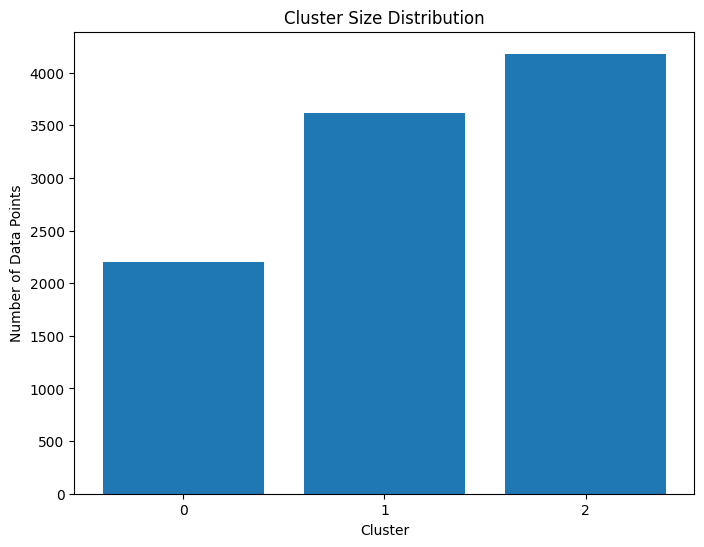

In [169]:
cluster_sizes = np.bincount(cluster_labels)
plt.figure(figsize=(8, 6))
plt.bar(range(len(cluster_sizes)), cluster_sizes, tick_label=range(len(cluster_sizes)))
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Size Distribution')
plt.show()
